In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu,softmax
import sys

**Import the path**

In [2]:
from glob import glob
glob('/content/drive/MyDrive/Colab Notebooks/Disease_detection/disease/train/*')

['/content/drive/MyDrive/Colab Notebooks/Disease_detection/disease/train/NORMAL',
 '/content/drive/MyDrive/Colab Notebooks/Disease_detection/disease/train/COVID19',
 '/content/drive/MyDrive/Colab Notebooks/Disease_detection/disease/train/PNEUMONIA']

In [3]:
from glob import glob
glob('/content/drive/MyDrive/Colab Notebooks/Disease_detection/disease/test/*')

['/content/drive/MyDrive/Colab Notebooks/Disease_detection/disease/test/NORMAL',
 '/content/drive/MyDrive/Colab Notebooks/Disease_detection/disease/test/COVID19',
 '/content/drive/MyDrive/Colab Notebooks/Disease_detection/disease/test/PNEUMONIA']

Found 5239 images belonging to 3 classes.
Found 1296 images belonging to 3 classes.
Epoch 1/2
164/164 [==============================] - 1863s 11s/step - loss: 0.6488 - Accuracy: 0.6843
Epoch 2/2
164/164 [==============================] - 121s 738ms/step - loss: 0.4164 - Accuracy: 0.8334
original image (1432, 1915, 3)
After resize image (200, 200, 3)
1/1 [==============================] - 0s 250ms/step
1
NORMAL


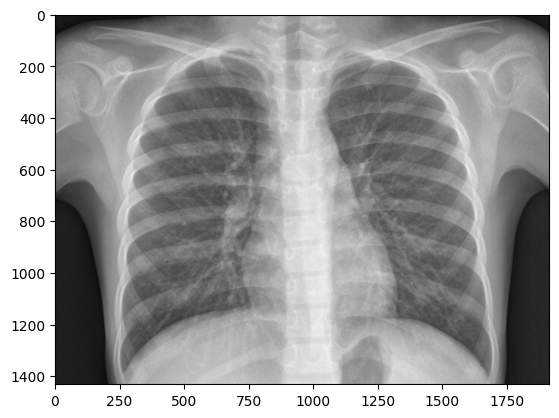

In [4]:
class DISEASE:
  def __init__(self):
    self.train_data_path='/content/drive/MyDrive/Colab Notebooks/Disease_detection/disease/train' #**Train and Test path**
    self.test_data_path='/content/drive/MyDrive/Colab Notebooks/Disease_detection/disease/test'
    self.height,self.width=200,200 #set the fixed size
    self.labels=['COVID19','NORMAL','PNEUMONIA'] # set the labels

  def Prediction(self,model):
    try:
      # Lets take the normal,covid19 or pneumonia image and check it
      image=plt.imread('/content/drive/MyDrive/Colab Notebooks/Disease_detection/disease/train/NORMAL/NORMAL(14).jpg')
      print("original image",image.shape)
      plt.imshow(image)
      image=cv2.resize(image,(self.height,self.width))# set them as same size
      print("After resize image",image.shape)
      image = np.array(image)/255.0
      image = np.expand_dims(image, axis=0)
      result = model.predict(image)
      sol = np.argmax(result,axis=1)
      print(sol[0])
      print(self.labels[sol[0]])

    except:
      print(f'error in main:,{sys.exc_info()}')


  def Disease_modelarchitecture(self,Train_data_preprocess,Test_data_preprocess):
    try:
      Train_data=Train_data_preprocess.flow_from_directory(self.train_data_path,target_size=(self.height,self.width),classes = self.labels , class_mode = 'categorical' , batch_size = 32)
      Test_data=Test_data_preprocess.flow_from_directory(self.test_data_path,target_size=(self.height,self.width),classes = self.labels , class_mode = 'categorical' , batch_size = 32)
      # Bulid the Architecture
      model=Sequential()# Initall steps for modeling architecture
      model.add(Conv2D(128,kernel_size=(3,3),input_shape=(self.height,self.width,3),padding='same',activation="relu"))# FIRST KERNEL AND MAXPOOL
      model.add(MaxPool2D(pool_size=(2,2)))
      model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation="relu"))# SECOND KERNEL AND MAXPOOL
      model.add(MaxPool2D(pool_size=(2,2)))
      model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation="relu"))# THIRD KERNEL AND MAXPOOL
      model.add(MaxPool2D(pool_size=(2,2)))
      model.add(Flatten())# 1D array
      # 1Darray given to ANN
      model.add(Dense(16,activation="relu"))# hidden layer 1
      model.add(Dense(8,activation="relu"))# hidden layer2
      model.add(Dense(3,activation="softmax"))# output layer
      model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['Accuracy'])# data has given to architecture
      model.fit(Train_data,epochs=2)#Training Begins
      return model

    except:
      print(f'error in main:,{sys.exc_info()}')


  def Disease_preprocess(self):
    try:
      Train_data_preprocess=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
      Test_data_preprocess=ImageDataGenerator(rescale=1./255)
      model=self.Disease_modelarchitecture(Train_data_preprocess,Test_data_preprocess)
      self.Prediction(model)
    except:
      print(f'error in main:,{sys.exc_info()}')


if __name__=='__main__':
  try:
    obj=DISEASE()
    obj.Disease_preprocess()
  except:
    print(f'error in main:,{sys.exc_info()}')

